# EDA

In [1]:
import pandas as pd
import os

In [2]:
print(os.getcwd())
os.chdir('../raw_data')
print(os.getcwd())

/Users/kumo/hec/courses/data_challenge_uw/Data-Challenge-URW-HEC/notebooks
/Users/kumo/hec/courses/data_challenge_uw/Data-Challenge-URW-HEC/raw_data


In [3]:
data = pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m
0,0,18,11273,249.520051,180.0,9257.0,9810.25,472952.50,509.62,24568.96,...,Jewellery,Jewellery & Watches,Modern Jewellery & Watches,886377.00,NaN,104.0,25034.0,0.0,11957.0,6337.0
1,1,18,11271,190.005359,120.0,9443.0,4891.25,362107.00,254.09,18810.75,...,Fashion apparel,Family Fashion,Family Fashion,20883319.00,NaN,203.0,33465.0,0.0,11957.0,6337.0
2,2,17,4319,1325.216860,780.0,5697.0,1981.23,280719.08,70.37,9970.90,...,Services,Imaterial services,Travel Agency,2339819.57,140492.0,72.0,18000.0,980.0,11957.0,6337.0
3,3,36,1201,621.422549,240.0,7179.0,29753.50,751216.75,1226.95,30978.01,...,Food & Beverage Services,Sweet moments,Confectionery,1129538.00,89064.0,107.0,80035.0,5038.0,11957.0,24846.0
4,4,36,1212,217.833860,120.0,7288.0,6082.50,357884.00,253.44,14911.83,...,Fashion apparel,Men's Fashion,Men's Fashion,340091.00,2181010.0,208.0,69226.0,0.0,11957.0,6337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3665,18,11264,255.038595,180.0,9407.0,14430.50,510585.25,749.64,26523.91,...,Home,Furniture & Interior Design,Tableware and kitchen tools,NaN,115075.0,175.0,72222.0,0.0,11957.0,6337.0
3642,3666,10,4706,294.363131,240.0,1171.0,3774.85,343803.85,134.08,12211.61,...,Food & Beverage Services,Gourmet Food Products,"Herbal, spices and tea products",1469703.00,270969.0,44.5,7274.0,3841.0,44342.0,6337.0
3643,3667,17,4271,316.565137,180.0,5829.0,11781.00,1529175.00,418.45,54314.96,...,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,NaN,83.0,1466.0,0.0,11957.0,6337.0
3644,3668,10,4535,699.828561,540.0,1391.0,38032.69,196593.23,1350.89,6982.82,...,Culture & Media & Technology,"Books, Music & Multimedia",Bookstore & stationery,66591.00,126061.0,732.3,24474.0,4211.0,14051.0,6337.0


## time features

convert the store open and close date to datetime, get the number of days the store lived until today

In [4]:
data['store_year_opened'] = pd.to_datetime(data['store_year_opened'], format='%d/%m/%Y')
data['store_year_closed'] = pd.to_datetime(data['store_year_closed'], format='%d/%m/%Y', errors='coerce')  # Coerce errors for any invalid or missing entries

In [5]:
from datetime import datetime

today = pd.to_datetime(datetime.now().strftime('%d/%m/%Y'))

data['living_days'] = data.apply(
    lambda row: (row['store_year_closed'] - row['store_year_opened']).days if pd.notnull(row['store_year_closed']) and row['store_year_closed']< pd.Timestamp('2099-01-01') else (today - row['store_year_opened']).days,
    axis=1
)

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/3563121989.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  today = pd.to_datetime(datetime.now().strftime('%d/%m/%Y'))


## Initial data overview

In [6]:
data

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m,living_days
0,0,18,11273,249.520051,180.0,9257.0,9810.25,472952.50,509.62,24568.96,...,Jewellery & Watches,Modern Jewellery & Watches,886377.00,NaN,104.0,25034.0,0.0,11957.0,6337.0,1948
1,1,18,11271,190.005359,120.0,9443.0,4891.25,362107.00,254.09,18810.75,...,Family Fashion,Family Fashion,20883319.00,NaN,203.0,33465.0,0.0,11957.0,6337.0,972
2,2,17,4319,1325.216860,780.0,5697.0,1981.23,280719.08,70.37,9970.90,...,Imaterial services,Travel Agency,2339819.57,140492.0,72.0,18000.0,980.0,11957.0,6337.0,6236
3,3,36,1201,621.422549,240.0,7179.0,29753.50,751216.75,1226.95,30978.01,...,Sweet moments,Confectionery,1129538.00,89064.0,107.0,80035.0,5038.0,11957.0,24846.0,2860
4,4,36,1212,217.833860,120.0,7288.0,6082.50,357884.00,253.44,14911.83,...,Men's Fashion,Men's Fashion,340091.00,2181010.0,208.0,69226.0,0.0,11957.0,6337.0,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3665,18,11264,255.038595,180.0,9407.0,14430.50,510585.25,749.64,26523.91,...,Furniture & Interior Design,Tableware and kitchen tools,NaN,115075.0,175.0,72222.0,0.0,11957.0,6337.0,1144
3642,3666,10,4706,294.363131,240.0,1171.0,3774.85,343803.85,134.08,12211.61,...,Gourmet Food Products,"Herbal, spices and tea products",1469703.00,270969.0,44.5,7274.0,3841.0,44342.0,6337.0,3448
3643,3667,17,4271,316.565137,180.0,5829.0,11781.00,1529175.00,418.45,54314.96,...,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,NaN,83.0,1466.0,0.0,11957.0,6337.0,919
3644,3668,10,4535,699.828561,540.0,1391.0,38032.69,196593.23,1350.89,6982.82,...,"Books, Music & Multimedia",Bookstore & stationery,66591.00,126061.0,732.3,24474.0,4211.0,14051.0,6337.0,1238


In [7]:
data.dtypes

Unnamed: 0                                    int64
external_mall_id                              int64
block_id                                      int64
average_dwell_time                          float64
median_dwell_time                           float64
store_id                                    float64
store_visits_monthly_average                float64
store_window_flow_monthly_average           float64
store_visits_daily_average                  float64
store_window_flow_daily_average             float64
store_total_visits                            int64
store_total_window_flow                       int64
days_with_traffic_data                        int64
mall_name                                    object
mall_country                                 object
mall_id                                     float64
total_mall_area                             float64
store_name                                   object
store_year_opened                    datetime64[ns]
store_year_c

In [8]:
data.describe()

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_year_opened,store_year_closed,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m,living_days
count,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3.646000e+03,3646.000000,3646.000000,...,3646,372,2.762000e+03,2.661000e+03,3646.000000,3.646000e+03,3646.000000,3.646000e+03,3.646000e+03,3646.000000
mean,1835.871366,20.781404,5587.304169,856.662893,543.867252,5905.183489,21605.634290,6.370229e+05,811.717512,23926.539281,...,2016-10-17 04:45:56.774547456,2024-04-18 14:46:27.096774400,5.430637e+06,6.120526e+05,452.915129,3.886040e+04,5114.302249,2.268479e+04,1.789006e+04,2982.316237
min,0.000000,7.000000,2.000000,114.512500,60.000000,1.000000,0.000000,1.612000e+03,0.000000,806.000000,...,1969-11-04 00:00:00,2021-06-22 00:00:00,0.000000e+00,-1.617320e+05,0.000000,-8.604200e+04,-41943.000000,-1.669500e+04,0.000000e+00,78.000000
25%,918.250000,14.000000,4315.000000,366.714484,180.000000,1943.250000,4737.047500,3.613795e+05,180.460000,13701.950000,...,2013-09-01 06:00:00,2024-02-16 12:00:00,4.995865e+05,8.446700e+04,76.750000,9.287750e+03,0.000000,1.195700e+04,6.337000e+03,1016.250000
50%,1834.500000,19.000000,5991.000000,530.873969,240.000000,5430.500000,10198.545000,5.414255e+05,386.605000,20852.855000,...,2018-07-17 00:00:00,2024-05-23 00:00:00,1.154851e+06,1.734600e+05,159.030000,1.799200e+04,67.000000,1.195700e+04,6.337000e+03,2326.000000
75%,2754.750000,28.000000,7107.750000,992.054124,480.000000,9947.750000,23670.922500,7.906363e+05,885.577500,30036.367500,...,2022-03-04 18:00:00,2024-07-28 00:00:00,3.149622e+06,4.320000e+05,333.850000,2.983775e+04,6768.000000,1.195700e+04,6.337000e+03,4119.000000
max,3669.000000,36.000000,13815.000000,7074.316406,6840.000000,12427.000000,444736.540000,6.131568e+06,17836.750000,217787.930000,...,2024-09-27 00:00:00,2024-11-05 00:00:00,2.724081e+08,6.461468e+07,24811.000000,1.631623e+06,218914.000000,1.221859e+06,1.156896e+06,20159.000000
std,1059.734049,8.077281,2937.427663,804.041412,728.462174,3932.262524,34102.897853,4.277492e+05,1268.571819,15691.373881,...,NaN,NaN,1.757487e+07,1.967345e+06,1286.715336,9.985694e+04,10300.685442,5.377119e+04,5.200992e+04,2687.905666


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         3646 non-null   int64         
 1   external_mall_id                   3646 non-null   int64         
 2   block_id                           3646 non-null   int64         
 3   average_dwell_time                 3646 non-null   float64       
 4   median_dwell_time                  3646 non-null   float64       
 5   store_id                           3646 non-null   float64       
 6   store_visits_monthly_average       3646 non-null   float64       
 7   store_window_flow_monthly_average  3646 non-null   float64       
 8   store_visits_daily_average         3646 non-null   float64       
 9   store_window_flow_daily_average    3646 non-null   float64       
 10  store_total_visits                 3

In [10]:
data.nunique()

Unnamed: 0                           3646
external_mall_id                       20
block_id                             3381
average_dwell_time                   3381
median_dwell_time                      82
store_id                             3454
store_visits_monthly_average         3453
store_window_flow_monthly_average    3415
store_visits_daily_average           3416
store_window_flow_daily_average      3400
store_total_visits                   3446
store_total_window_flow              3415
days_with_traffic_data                259
mall_name                              21
mall_country                            9
mall_id                                21
total_mall_area                        21
store_name                           1660
store_year_opened                    2042
store_year_closed                     192
store_branch_level_1                   17
store_branch_level_2                   52
store_branch_level_3                  122
store_sales_r12m                  

## Visualization of Key Metrics

/opt/anaconda3/envs/foo-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/foo-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


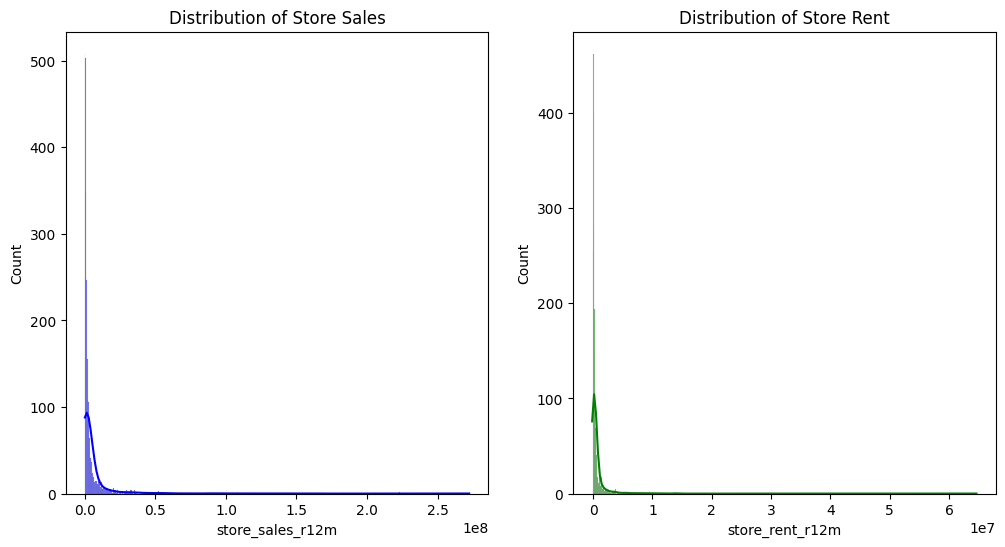

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for sales and rent
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['store_sales_r12m'].dropna(), kde=True, color='blue')
plt.title('Distribution of Store Sales')

plt.subplot(1, 2, 2)
sns.histplot(data['store_rent_r12m'].dropna(), kde=True, color='green')
plt.title('Distribution of Store Rent')
plt.show()


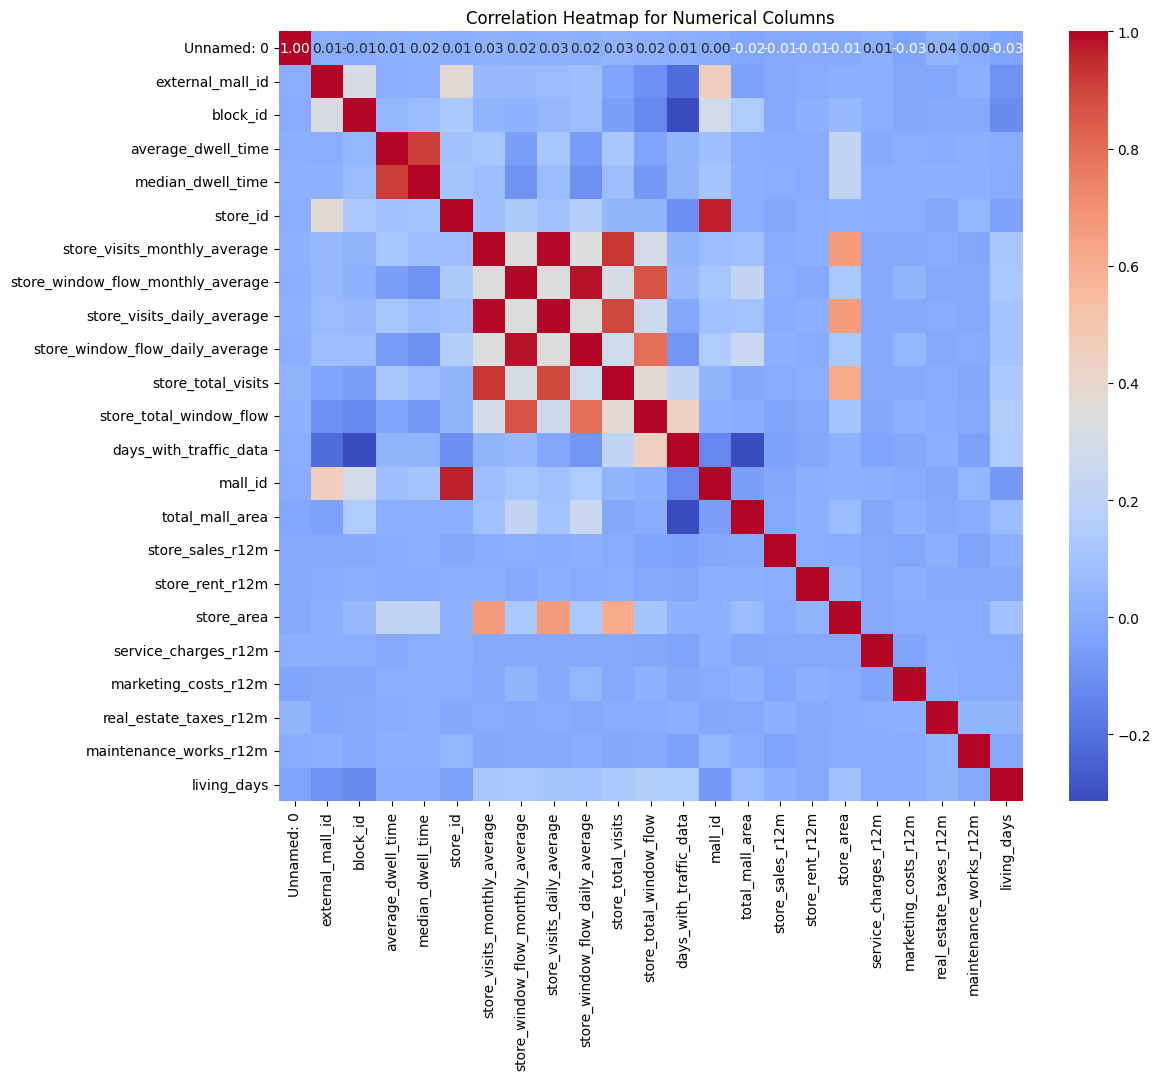

In [12]:
# Correlation heatmap
# Filter the DataFrame to include only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_data.corr()

# Generate a heatmap for the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

## bivariate analysis

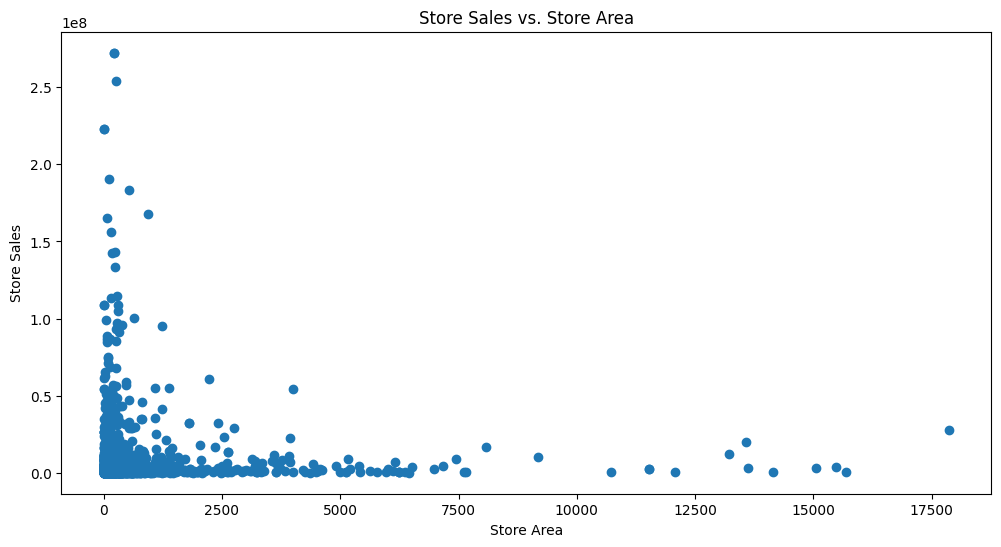

In [13]:
# Scatter plots to explore relationships
plt.figure(figsize=(12, 6))
plt.scatter(data['store_area'], data['store_sales_r12m'])
plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.title('Store Sales vs. Store Area')
plt.show()


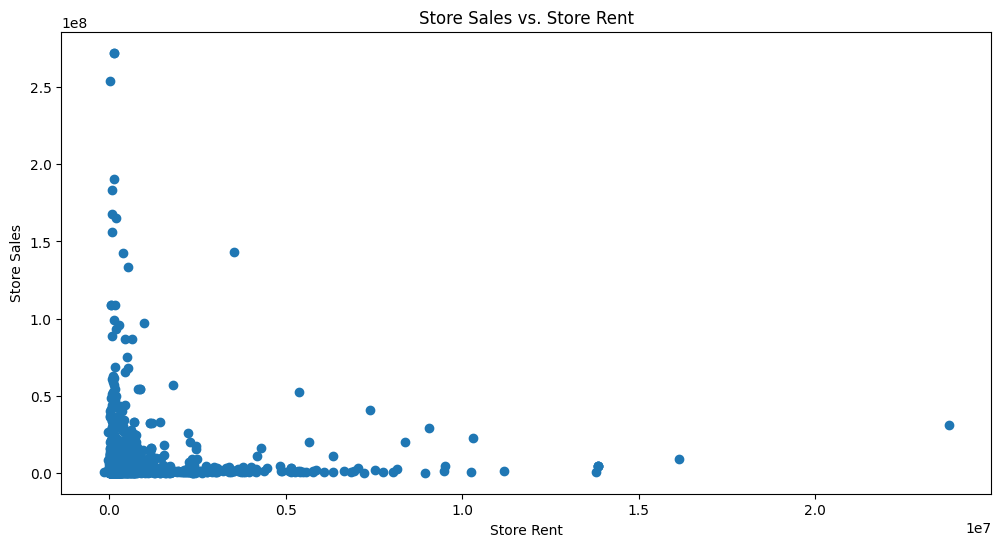

In [14]:
# Scatter plots to explore relationships
plt.figure(figsize=(12, 6))
plt.scatter(data['store_rent_r12m'], data['store_sales_r12m'])
plt.xlabel('Store Rent')
plt.ylabel('Store Sales')
plt.title('Store Sales vs. Store Rent')
plt.show()


## Analyzing the Top Categories in Branch Levels

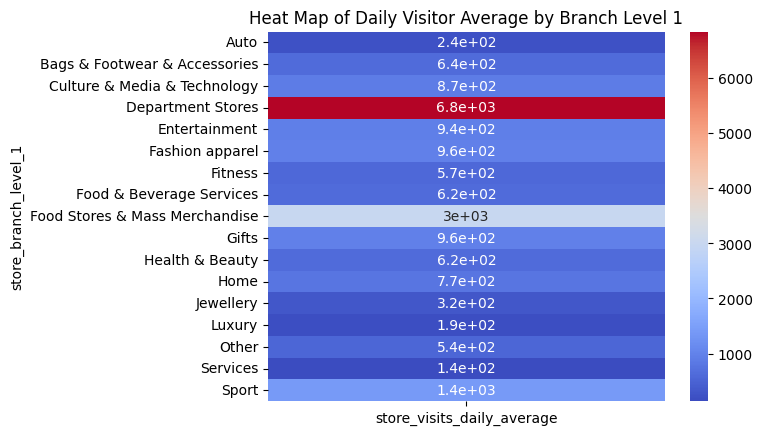

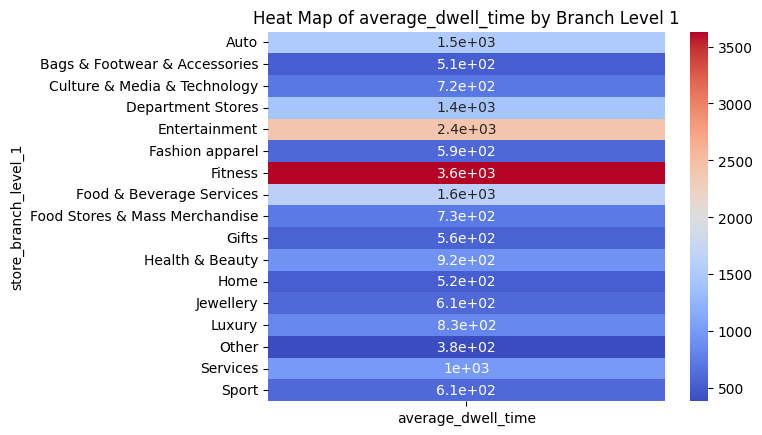

In [15]:
pivot_data = data.pivot_table(values='store_visits_daily_average', index='store_branch_level_1', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of Daily Visitor Average by Branch Level 1')
plt.show()

pivot_data = data.pivot_table(values='average_dwell_time', index='store_branch_level_1', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of average_dwell_time by Branch Level 1')
plt.show()

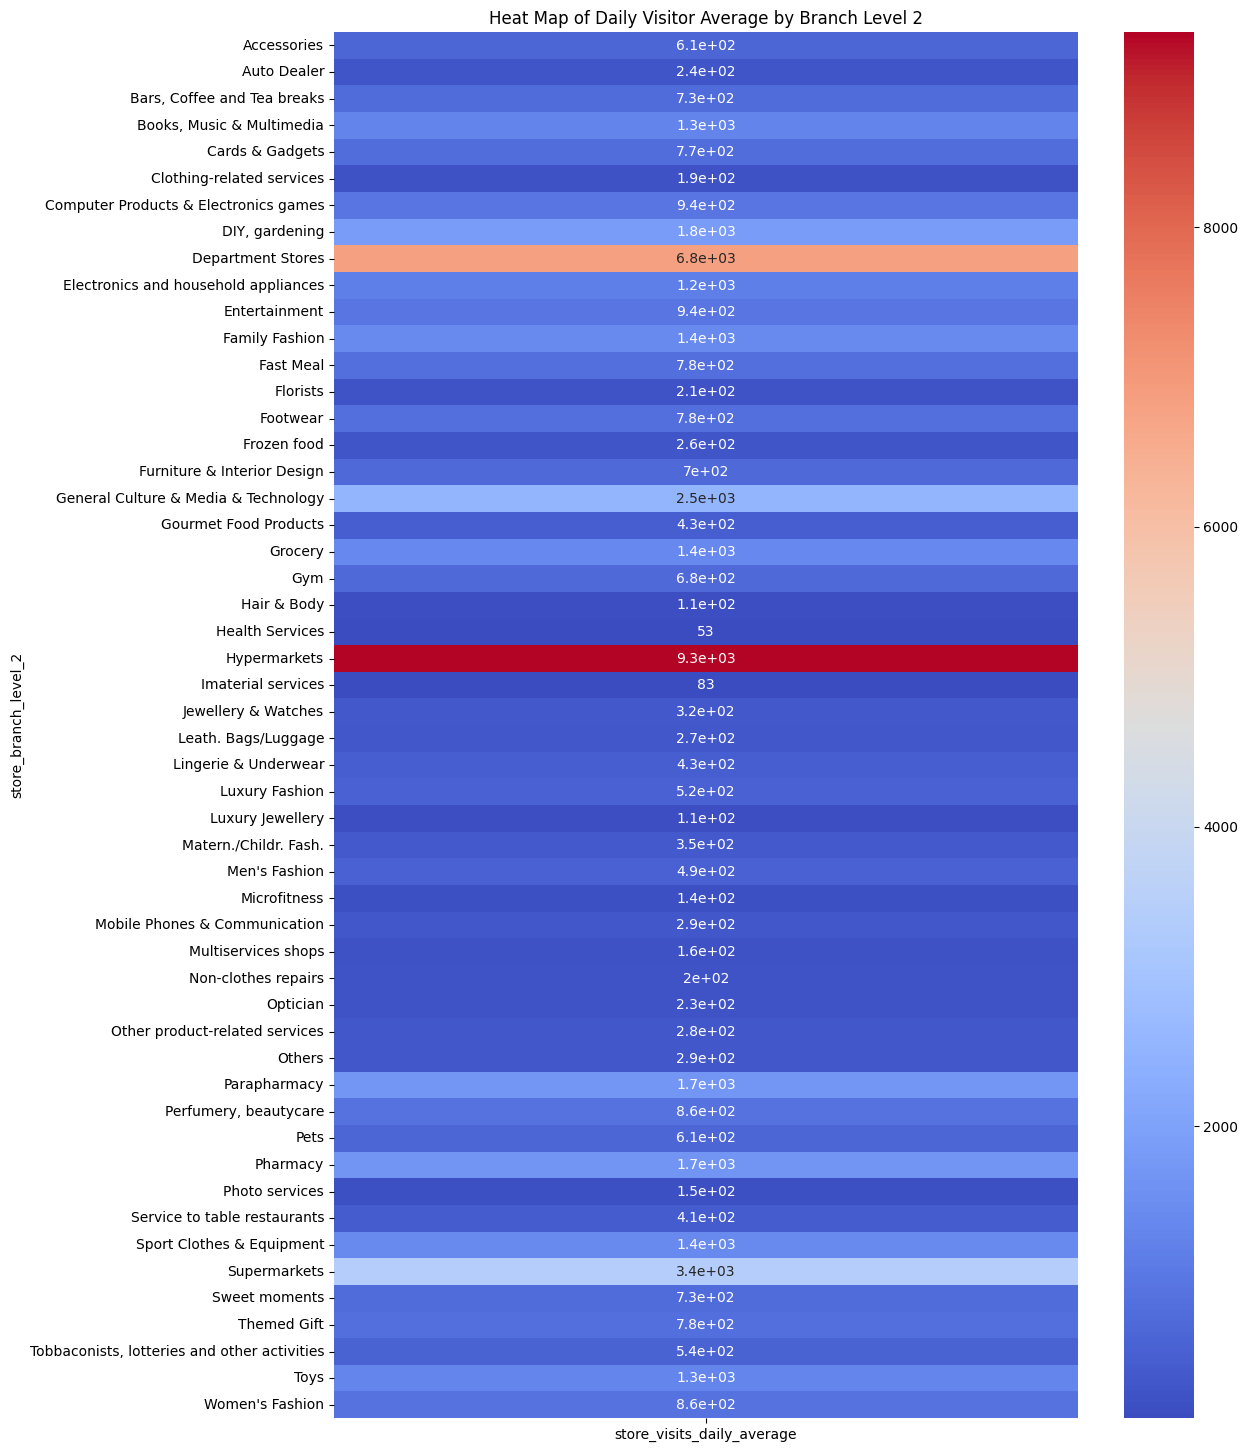

In [16]:
plt.figure(figsize=(12, 18))
pivot_data = data.pivot_table(values='store_visits_daily_average', index='store_branch_level_2', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of Daily Visitor Average by Branch Level 2')
plt.show()

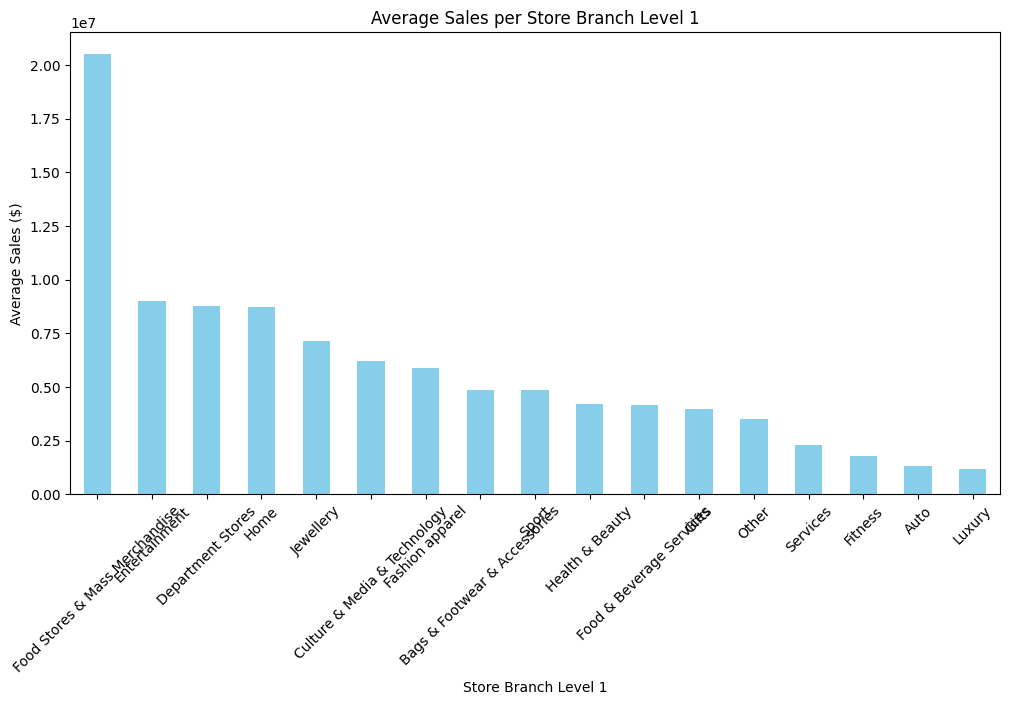

In [17]:
avg_sales_per_level = data.groupby('store_branch_level_1')['store_sales_r12m'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_sales_per_level.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Sales per Store Branch Level 1')
plt.xlabel('Store Branch Level 1')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.show()

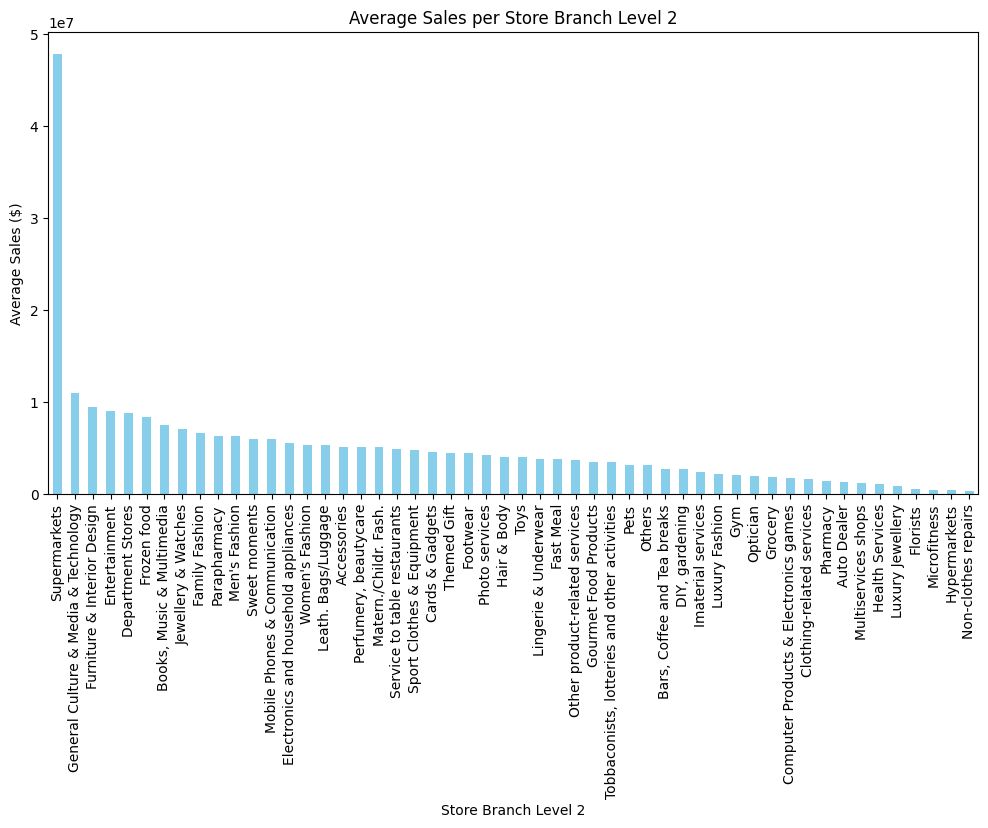

In [18]:
avg_sales_per_level = data.groupby('store_branch_level_2')['store_sales_r12m'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_sales_per_level.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Sales per Store Branch Level 2')
plt.xlabel('Store Branch Level 2')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=90)
plt.show()

# feature engineering

## Encode Text Features (label encode)

In [22]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_mall_country = LabelEncoder()
le_store_branch_level_1 = LabelEncoder()
le_store_branch_level_2 = LabelEncoder()
le_store_branch_level_3 = LabelEncoder()


data['mall_country'] = le_mall_country.fit_transform(data['mall_country'])
data['store_branch_level_1'] = le_store_branch_level_1.fit_transform(data['store_branch_level_1'])
data['store_branch_level_2'] = le_store_branch_level_2.fit_transform(data['store_branch_level_2'])
data['store_branch_level_3'] = le_store_branch_level_3.fit_transform(data['store_branch_level_3'])

data

## Total Cost

In [28]:
data['total_costs_r12m'] = (data['service_charges_r12m'] +
                              data['marketing_costs_r12m'] +
                              data['real_estate_taxes_r12m'] +
                              data['maintenance_works_r12m'])


## Ratios

In [ ]:
# total visit / window flow
data['visit_to_window_flow_ratio'] = data['store_total_visits'] / data['store_total_window_flow']

# sales / rent
data['sales_to_rent_ratio'] = data['store_sales_r12m'] / data['store_rent_r12m']

# sales / cost
data['sales_to_cost_ratio'] = data['store_sales_r12m'] / data['total_costs_r12m']


# EDA pt.2

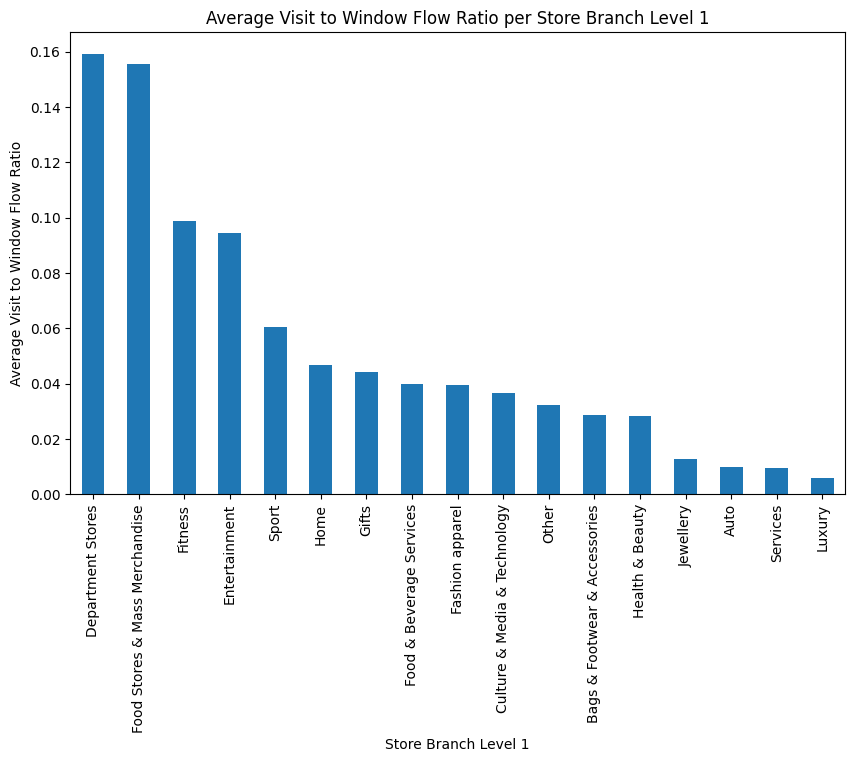

In [ ]:
avg_visit_to_window_ratio = data.groupby('store_branch_level_1')['visit_to_window_flow_ratio'].mean()

plt.figure(figsize=(10, 6))
avg_visit_to_window_ratio.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Visit to Window Flow Ratio per Store Branch Level 1')
plt.xlabel('Store Branch Level 1')
plt.ylabel('Average Visit to Window Flow Ratio')
plt.xticks(rotation=90)
plt.show()

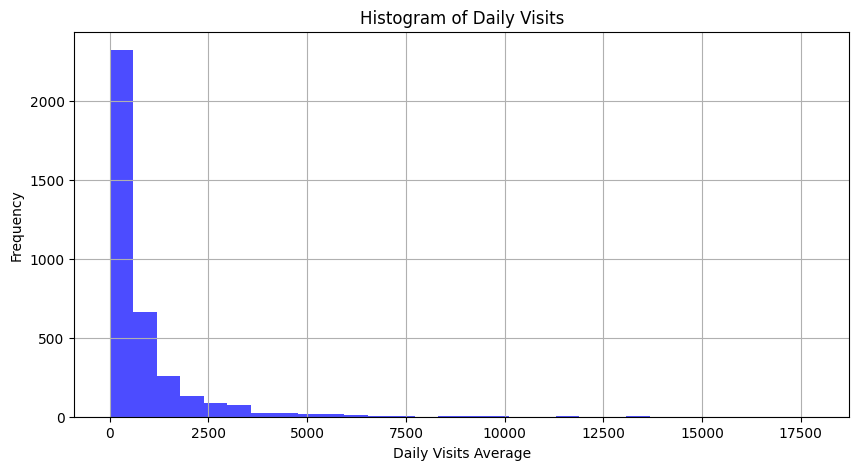

In [ ]:
import matplotlib.pyplot as plt

# Plotting Daily Visits
plt.figure(figsize=(10, 5))
plt.hist(data['store_visits_daily_average'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Daily Visits')
plt.xlabel('Daily Visits Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

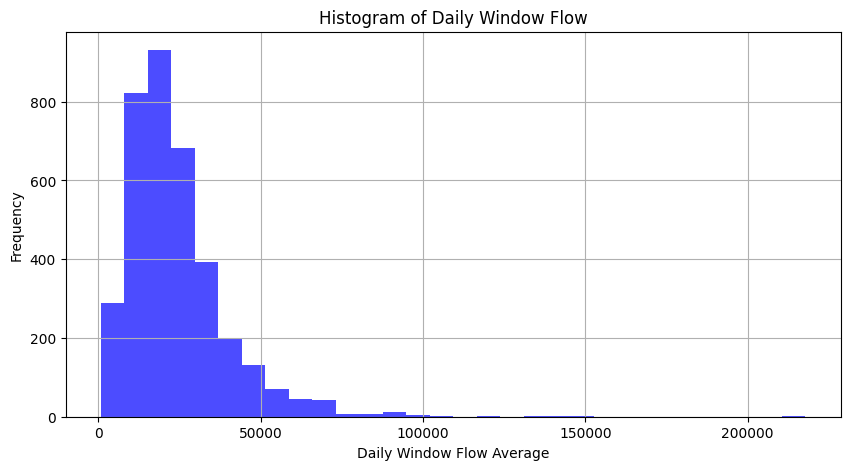

In [ ]:
# Plotting Window Flow
plt.figure(figsize=(10, 5))
plt.hist(data['store_window_flow_daily_average'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Daily Window Flow')
plt.xlabel('Daily Window Flow Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

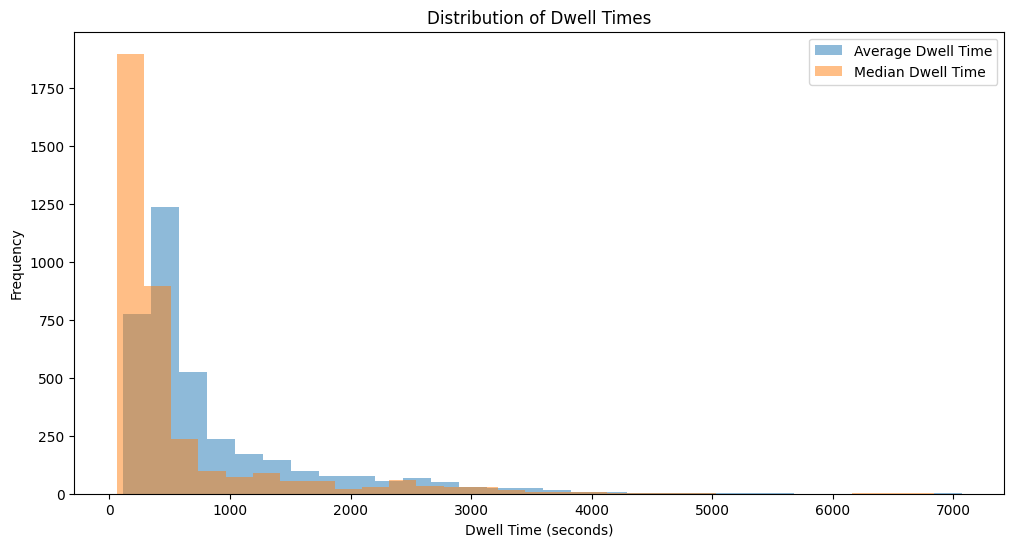

In [ ]:

# Dwell Time Distribution
plt.figure(figsize=(12, 6))
plt.hist(data['average_dwell_time'], bins=30, alpha=0.5, label='Average Dwell Time')
plt.hist(data['median_dwell_time'], bins=30, alpha=0.5, label='Median Dwell Time')
plt.title('Distribution of Dwell Times')
plt.xlabel('Dwell Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


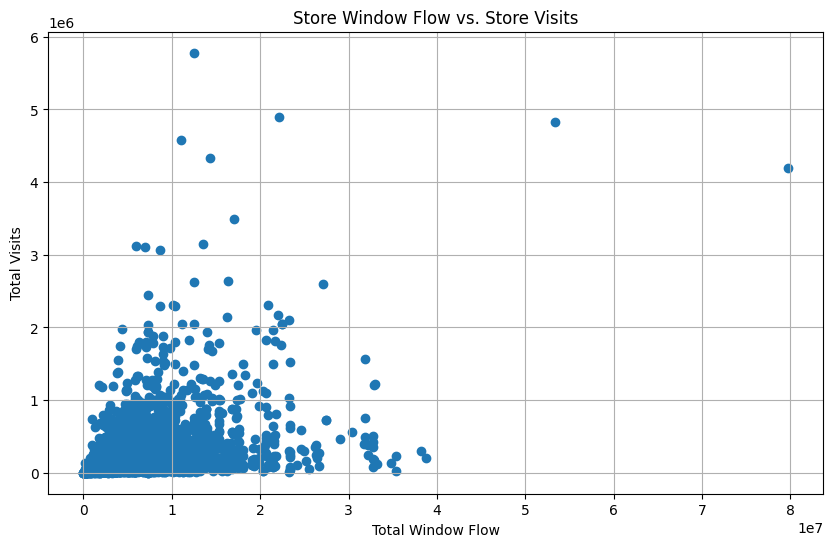

In [ ]:

# Scatter Plot for Store Window Flow vs. Visits
plt.figure(figsize=(10, 6))
plt.scatter(data['store_total_window_flow'], data['store_total_visits'])
plt.title('Store Window Flow vs. Store Visits')
plt.xlabel('Total Window Flow')
plt.ylabel('Total Visits')
plt.grid(True)
plt.show()

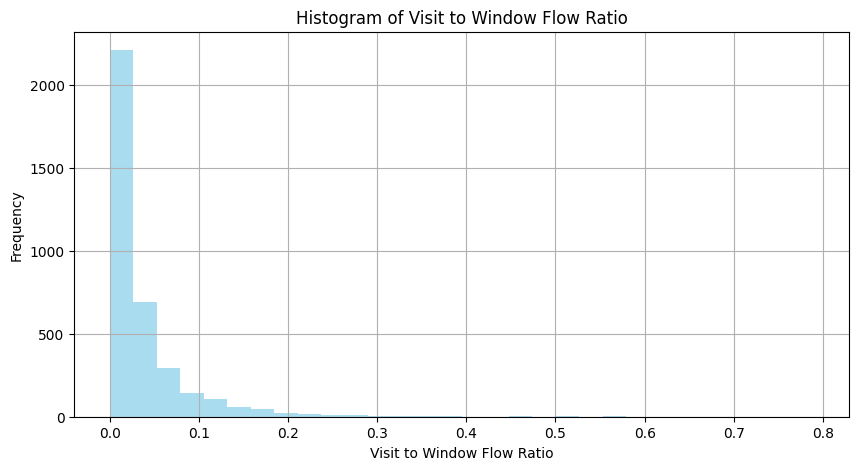

In [ ]:

# Histogram of Visit to Window Flow Ratio
plt.figure(figsize=(10, 5))
plt.hist(data['visit_to_window_flow_ratio'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Visit to Window Flow Ratio')
plt.xlabel('Visit to Window Flow Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

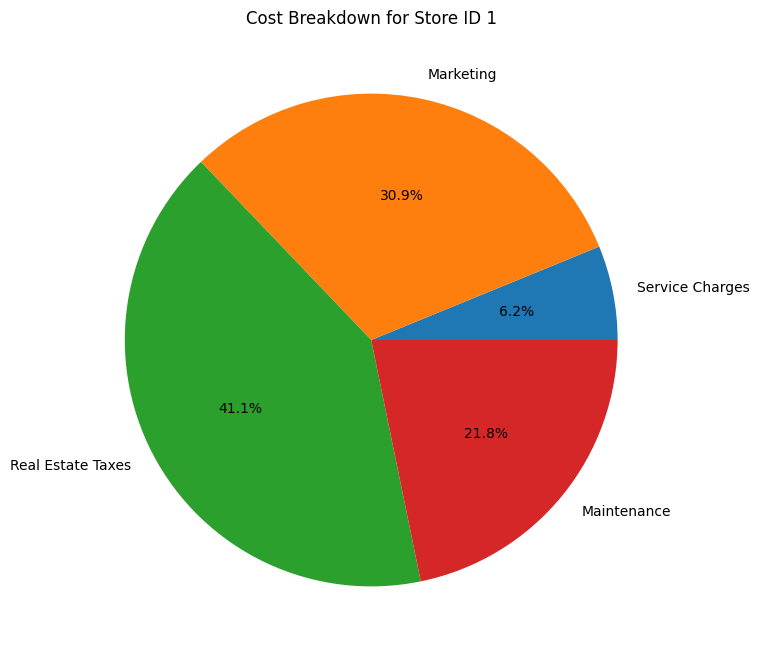

In [ ]:
# Cost Breakdown Pie Chart for a specific store (example store_id = 1)
specific_store = data[data['store_id'] == 1]
cost_labels = [ 'Service Charges', 'Marketing', 'Real Estate Taxes',  'Maintenance']
cost_values = [
               specific_store['service_charges_r12m'].iloc[0],
               specific_store['marketing_costs_r12m'].iloc[0],
               specific_store['real_estate_taxes_r12m'].iloc[0],
               specific_store['maintenance_works_r12m'].iloc[0]]

plt.figure(figsize=(8, 8))
plt.pie(cost_values, labels=cost_labels, autopct='%1.1f%%')
plt.title('Cost Breakdown for Store ID 1')
plt.show()

# key metrics

## traffic

- marketing efficiency = Window Flow/marketing cost
- Visit Rate: Visitor Count / Window Flow Count

make it based on month

In [30]:
data.columns

Index(['Unnamed: 0', 'external_mall_id', 'block_id', 'average_dwell_time',
       'median_dwell_time', 'store_id', 'store_visits_monthly_average',
       'store_window_flow_monthly_average', 'store_visits_daily_average',
       'store_window_flow_daily_average', 'store_total_visits',
       'store_total_window_flow', 'days_with_traffic_data', 'mall_name',
       'mall_country', 'mall_id', 'total_mall_area', 'store_name',
       'store_year_opened', 'store_year_closed', 'store_branch_level_1',
       'store_branch_level_2', 'store_branch_level_3', 'store_sales_r12m',
       'store_rent_r12m', 'store_area', 'service_charges_r12m',
       'marketing_costs_r12m', 'real_estate_taxes_r12m',
       'maintenance_works_r12m', 'living_days', 'total_costs_r12m'],
      dtype='object')

In [31]:
identity = ['store_id', 'block_id', 'mall_id', 'external_mall_id']
metrics = data[identity]

In [32]:
# marketing efficiency
metrics['mkt_effc'] = data['store_window_flow_monthly_average']/(data['marketing_costs_r12m']/12) 

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1346066364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['mkt_effc'] = data['store_window_flow_monthly_average']/(data['marketing_costs_r12m']/12)


In [33]:
# visit rate
# there are monthly, daily and total 
metrics['monthly_visit/window'] = data['store_visits_monthly_average'] / data['store_window_flow_monthly_average']
metrics['daily_visit/window'] = data['store_visits_daily_average'] / data['store_window_flow_daily_average']
metrics['total_visit/window'] = data['store_total_visits'] / data['store_total_window_flow']

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1795006489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['monthly_visit/window'] = data['store_visits_monthly_average'] / data['store_window_flow_monthly_average']
/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1795006489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['daily_visit/window'] = data['store_visits_daily_average'] / data['store_window_flow_daily_average']
/var/folders/z9/zf5v62yj5_75v0dw

In [34]:
metrics.head(10)
# since they are almost the same, we only keep one
metrics.drop(['daily_visit/window', 'total_visit/window'], axis=1, inplace=True)
metrics.rename(columns={'monthly_visit/window':'visit_rate'}, inplace=True)

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1917769999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics.drop(['daily_visit/window', 'total_visit/window'], axis=1, inplace=True)
/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1917769999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics.rename(columns={'monthly_visit/window':'visit_rate'}, inplace=True)


## sales

In [35]:
# revenue per visit
# time unit, month
metrics['RPV'] = (data['store_sales_r12m']/12)/data['store_visits_monthly_average']

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/2476251328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['RPV'] = (data['store_sales_r12m']/12)/data['store_visits_monthly_average']


In [36]:
# revenue per m2
# RPM 
metrics['RPM'] = (data['store_sales_r12m']/12)/data['store_area']

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/3968750639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['RPM'] = (data['store_sales_r12m']/12)/data['store_area']


In [37]:
# Rvenue efficiency
metrics['RE'] = data['store_sales_r12m']/data['store_rent_r12m']

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/3354451396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['RE'] = data['store_sales_r12m']/data['store_rent_r12m']


## cost

In [38]:
data.columns

Index(['Unnamed: 0', 'external_mall_id', 'block_id', 'average_dwell_time',
       'median_dwell_time', 'store_id', 'store_visits_monthly_average',
       'store_window_flow_monthly_average', 'store_visits_daily_average',
       'store_window_flow_daily_average', 'store_total_visits',
       'store_total_window_flow', 'days_with_traffic_data', 'mall_name',
       'mall_country', 'mall_id', 'total_mall_area', 'store_name',
       'store_year_opened', 'store_year_closed', 'store_branch_level_1',
       'store_branch_level_2', 'store_branch_level_3', 'store_sales_r12m',
       'store_rent_r12m', 'store_area', 'service_charges_r12m',
       'marketing_costs_r12m', 'real_estate_taxes_r12m',
       'maintenance_works_r12m', 'living_days', 'total_costs_r12m'],
      dtype='object')

In [40]:
# cost per m2
metrics['CPM'] = (data['total_costs_r12m']/12)/data['store_area']
# profit margin 
metrics['PM'] = (data['store_sales_r12m']-data['total_costs_r12m'])/data['store_sales_r12m']


/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1835776251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['CPM'] = (data['total_costs_r12m']/12)/data['store_area']
/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/1835776251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['PM'] = (data['store_sales_r12m']-data['total_costs_r12m'])/data['store_sales_r12m']


In [41]:
metrics.head(10)

,store_id,block_id,mall_id,external_mall_id,mkt_effc,visit_rate,RPV,RPM,RE,CPM,PM
0,9257.0,11273,54.0,18,inf,0.020743,7.529344,710.237981,NaN,34.717949,0.951118
1,9443.0,11271,54.0,18,inf,0.013508,355.793833,8572.791051,NaN,21.247537,0.997522
2,5697.0,4319,15.0,17,3437.376490,0.007058,98.416117,2708.124502,16.654468,43.141204,0.984070
3,7179.0,1201,35.0,36,1789.321358,0.039607,3.163600,879.702492,12.682318,94.919003,0.892101
4,7288.0,1212,35.0,36,inf,0.016996,4.659419,136.254407,0.155933,35.064103,0.742657
5,5451.0,425,12.0,15,inf,0.042532,5.162610,378.339812,NaN,7.891048,0.979143
6,4491.0,6726,26.0,22,inf,0.006664,10.158061,891.635659,NaN,90.429264,0.898580
7,1650.0,7313,6.0,30,inf,0.014437,NaN,NaN,NaN,63.532051,NaN
8,11057.0,2224,62.0,24,inf,0.069089,2.313707,326.579904,10.445250,171.837261,0.473828
9,1468.0,4674,4.0,10,inf,0.007416,30.134355,328.098129,NaN,16.252174,0.950466


## engagement

Space utilization = dwell / area

In [43]:
# using median dwell in case outlier effect
metrics['Space_u'] = data['median_dwell_time']/data['store_area']

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_82629/2825203873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Space_u'] = data['median_dwell_time']/data['store_area']


In [44]:
metrics.head(5)

,store_id,block_id,mall_id,external_mall_id,mkt_effc,visit_rate,RPV,RPM,RE,CPM,PM,Space_u
0,9257.0,11273,54.0,18,inf,0.020743,7.529344,710.237981,NaN,34.717949,0.951118,1.730769
1,9443.0,11271,54.0,18,inf,0.013508,355.793833,8572.791051,NaN,21.247537,0.997522,0.591133
2,5697.0,4319,15.0,17,3437.376490,0.007058,98.416117,2708.124502,16.654468,43.141204,0.984070,10.833333
3,7179.0,1201,35.0,36,1789.321358,0.039607,3.163600,879.702492,12.682318,94.919003,0.892101,2.242991
4,7288.0,1212,35.0,36,inf,0.016996,4.659419,136.254407,0.155933,35.064103,0.742657,0.576923
